# Information Gain (which feature to select)
# Feature Selection-Information gain- Mutual Information in Classification Problem statements. In feature selection we try to compare dependent feature with independent feature and that time we apply hypothesis testing

# Mutual Information
## MI estimate mutual information for a discrete target variable . It helps to find out the relation ship between independent and dependent features 
## Check:-  sklearn.feature_selection.mutual_info_classif

In [1]:
# For Classification
import pandas as pd

In [2]:
df=pd.read_csv("wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# how many unique values are there
df['Wine'].unique() # only 3 category of wine are present

array([1, 2, 3], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
### Always do train test split to overcome overfitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    df.drop('Wine',axis=1),     #independet features
    df['Wine'],                   #dependent features
    test_size=0.3,
    random_state=0)
    
x_train.shape , x_test.shape

((124, 13), (54, 13))

In [6]:
x_train

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985


In [7]:
x_test

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
160,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480


In [9]:
# we will be using feature selection classification problem
from sklearn.feature_selection import mutual_info_classif
# Determine the mutual information
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info
# we are getting the information gain(no negative value)
# the value which we are getting the highest, that is the highest information gain
# Here the highest case is 0.71

array([0.4174641 , 0.29184649, 0.13501435, 0.27035205, 0.2156975 ,
       0.46386761, 0.71954017, 0.13975654, 0.26568266, 0.62355469,
       0.55975571, 0.54724135, 0.54303803])

In [10]:
# Getting feature name along with IG along with it
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns # index= column name
mutual_info.sort_values(ascending=False)
#Flavanoid has the highest dependency on the target feature wine

Flavanoids              0.719540
Color.int               0.623555
Hue                     0.559756
OD                      0.547241
Proline                 0.543038
Phenols                 0.463868
Alcohol                 0.417464
Malic.acid              0.291846
Acl                     0.270352
Proanth                 0.265683
Mg                      0.215697
Nonflavanoid.phenols    0.139757
Ash                     0.135014
dtype: float64

<Axes: >

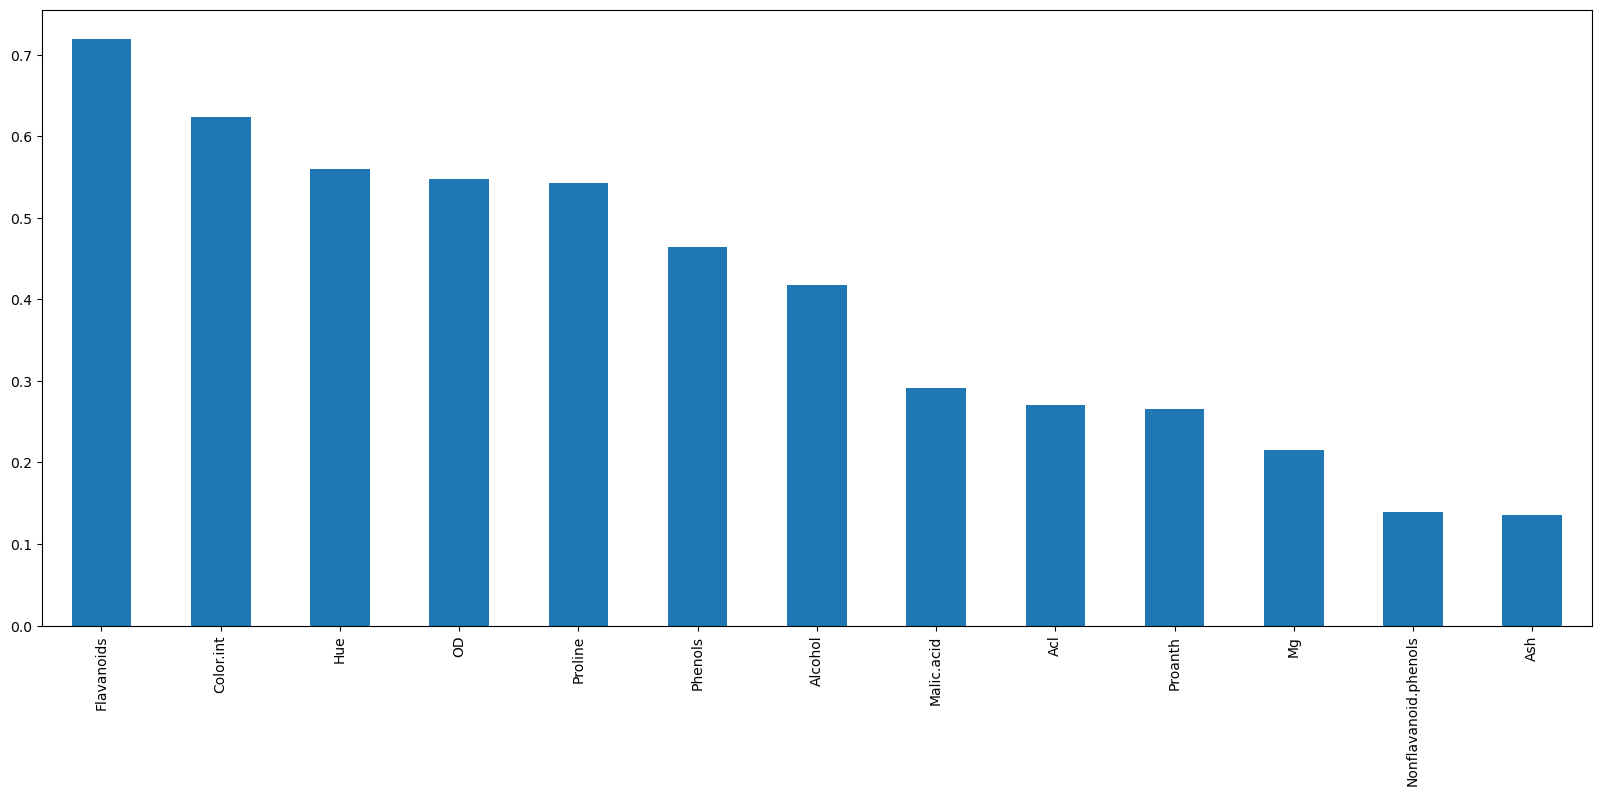

In [11]:
# Lets Plot a bar graph
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [12]:
# We are going to take the top best features based on information gain value
from sklearn.feature_selection import SelectKBest

# So we will select the top 5 important features
sel_five_cols=SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(x_train.fillna(0),y_train)
#sel_five_cols.fit(x_train.fillna(0),y_train)- if we are having some null values
x_train.columns[sel_five_cols.get_support()]
#get_support() - gives us the index
#check the formula of information gain and mutual information(almost same)
# mutual_info_classif(library) - calculate the MI between dependent and independent features

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [14]:
sel_five_cols.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [15]:
sel_five_cols.feature_names_in_

array(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int',
       'Hue', 'OD', 'Proline'], dtype=object)

In [13]:
mutual_info_classif

<function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>